In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
img_height=256
img_width=256
batch_size=32

In [43]:
train_path='/content/drive/MyDrive/Oldimages/train'
test_path='/content/drive/MyDrive/Oldimages/test'

In [45]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=123  # Add the seed argument
)

Found 163 files belonging to 7 classes.
Using 131 files for training.


In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=123  # Add the seed argument
)

Found 163 files belonging to 7 classes.
Using 32 files for validation.


In [47]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 44 files belonging to 7 classes.


In [48]:
class_names= train_ds.class_names
print(class_names)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


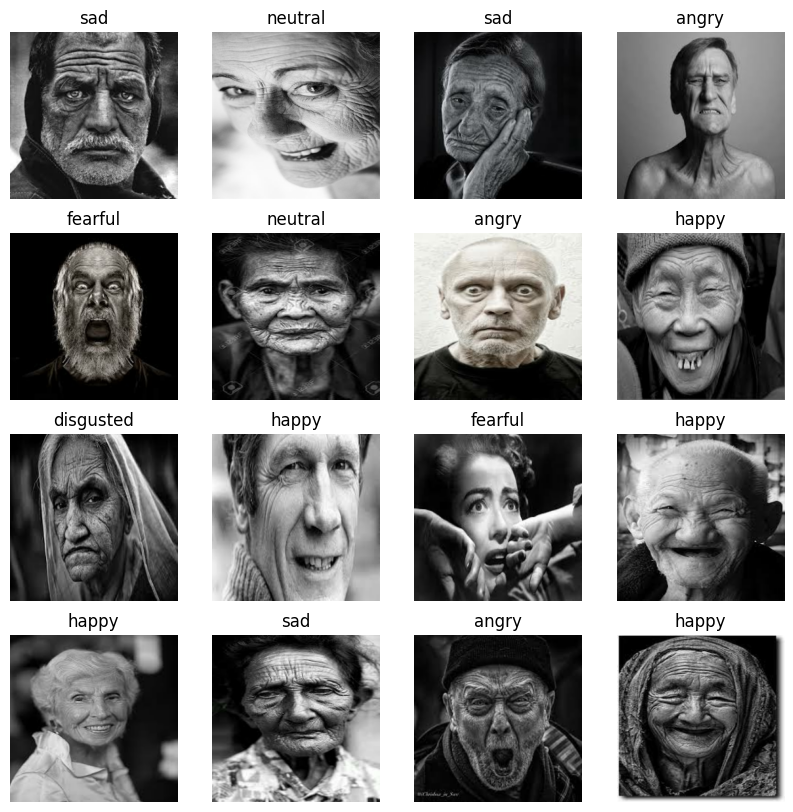

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [49]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [50]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [51]:
num_classes = len(class_names)


In [52]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [53]:
model.build(input_shape=(None, img_height, img_width, 3))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)       

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 14s 2s/step - loss: 2.0845 - accuracy: 0.1450 - val_loss: 1.9353 - val_accuracy: 0.1875
Epoch 2/10
5/5 [==============================] - 14s 2s/step - loss: 1.9135 - accuracy: 0.2519 - val_loss: 2.0523 - val_accuracy: 0.1875
Epoch 3/10
5/5 [==============================] - 15s 2s/step - loss: 1.8791 - accuracy: 0.2672 - val_loss: 1.9636 - val_accuracy: 0.2500
Epoch 4/10
5/5 [==============================] - 14s 3s/step - loss: 1.8270 - accuracy: 0.2443 - val_loss: 1.9858 - val_accuracy: 0.2188
Epoch 5/10
5/5 [==============================] - 14s 3s/step - loss: 1.8090 - accuracy: 0.2595 - val_loss: 2.0815 - val_accuracy: 0.1250
Epoch 6/10
5/5 [==============================] - 14s 3s/step - loss: 1.7902 - accuracy: 0.3053 - val_loss: 2.0416 - val_accuracy: 0.1875
Epoch 7/10
5/5 [==============================] - 14s 3s/step - loss: 1.7687 - accuracy: 0.2824 - val_loss: 2.0469 - val_accuracy: 0.1562
Epoch 8/10
5/5 [==================

In [59]:
emotionold_url='https://i.pinimg.com/originals/1c/16/61/1c1661f1ce23ec85d6f4e603dd760a10.jpg'
emotionold_path = tf.keras.utils.get_file('happy_old', origin=emotionold_url)

img = keras.preprocessing.image.load_img(
    emotionold_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 50ms/step
This image most likely belongs to happy with a 64.26 percent confidence.


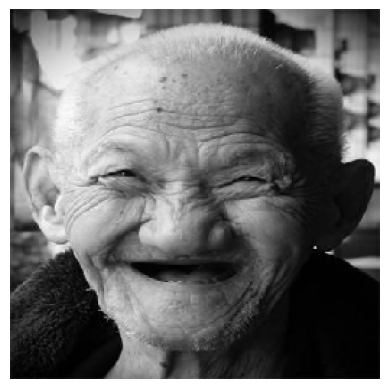

1/1 [==============================] - 0s 54ms/step
This image most likely belongs to happy with a 64.26% confidence.


In [60]:
image_path = '/content/happyold.jpeg'  

# Load the image
img = keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess the image
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# Perform the prediction on the image
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Get the predicted label and accuracy
class_index = np.argmax(score)
class_name = class_names[class_index]
accuracy = 100 * np.max(score)

# Print the predicted label and accuracy
print("This image most likely belongs to {} with a {:.2f}% confidence.".format(class_name, accuracy))


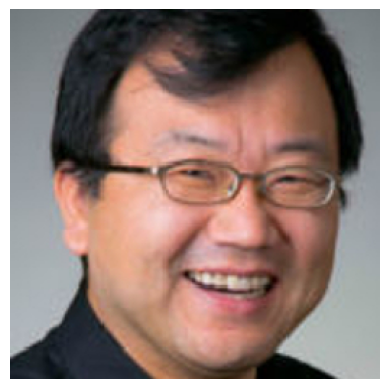

1/1 [==============================] - 0s 66ms/step
This image most likely belongs to happy with a 49.18% confidence.


In [61]:
image_path = '/content/happyyoung.jpeg'  

# Load the image
img = keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Preprocess the image
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# Perform the prediction on the image
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Get the predicted label and accuracy
class_index = np.argmax(score)
class_name = class_names[class_index]
accuracy = 100 * np.max(score)

# Print the predicted label and accuracy
print("This image most likely belongs to {} with a {:.2f}% confidence.".format(class_name, accuracy))
